In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#Opening all the files that are going to be used and manipulated
chart = pd.read_csv('USA DataCoSupplyChainDataset.csv',encoding = "ISO-8859-1")
population = pd.read_csv('population_by_country_2020.csv')
hhe = pd.read_csv('householdexpenditure.csv')

In [42]:
#Filtering the data frame so that it only shows the segment that is goinf to be\
#used: Men, women and children apparel clothing. 

chart_filtered = chart.loc[(chart['Department Name'] == 'Apparel') & \
                            (chart['Category Name'].isin(["Women's Clothing",
                                                          "Men's Clothing",
                                                          "Children's Clothing"])) &\
                          (chart['Year'].isin([2015,2016,2017]))]
chart_filtered.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Year,Month,Day
257,DEBIT,4,4,72.860001,200.710007,Shipping on time,0,76,Women's Clothing,Houston,...,NaN,http://images.acmesports.sports/Summer+dresses,Summer dresses,215.820007,0,12/18/2017 15:39,Standard Class,2017,12,18
264,DEBIT,5,4,-140.500000,200.710007,Late delivery,1,76,Women's Clothing,Placentia,...,NaN,http://images.acmesports.sports/Summer+dresses,Summer dresses,215.820007,0,12/18/2017 20:44,Standard Class,2017,12,18
272,DEBIT,4,4,94.019997,191.869995,Shipping on time,0,70,Men's Clothing,Pompano Beach,...,NaN,http://images.acmesports.sports/Men+gala+suit,Men's gala suit,210.850006,0,11/28/2017 19:11,Standard Class,2017,11,28
624,DEBIT,5,2,145.699997,303.540008,Late delivery,1,63,Children's Clothing,Caguas,...,NaN,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,10/24/2017 11:10,Second Class,2017,10,24
826,DEBIT,5,4,40.619999,324.959992,Late delivery,1,63,Children's Clothing,Baltimore,...,NaN,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,12/27/2017 20:12,Standard Class,2017,12,27


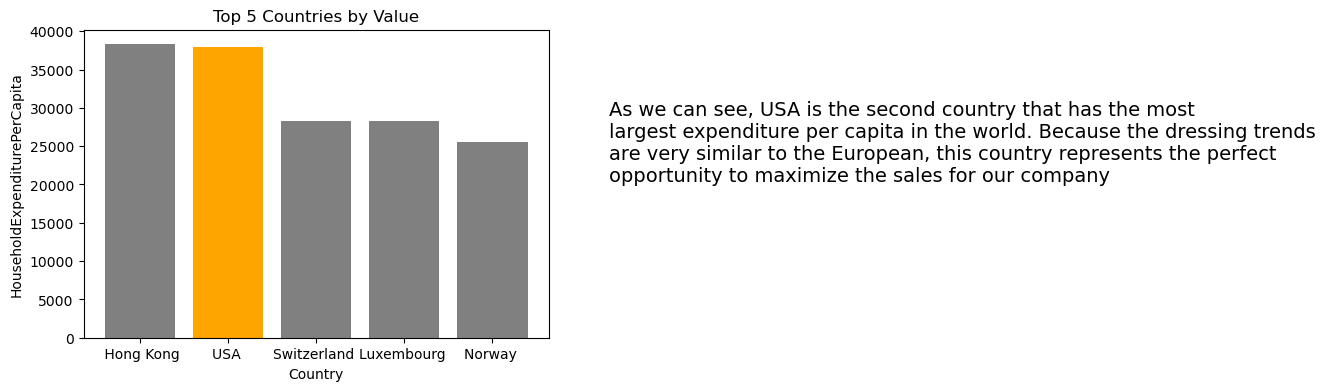

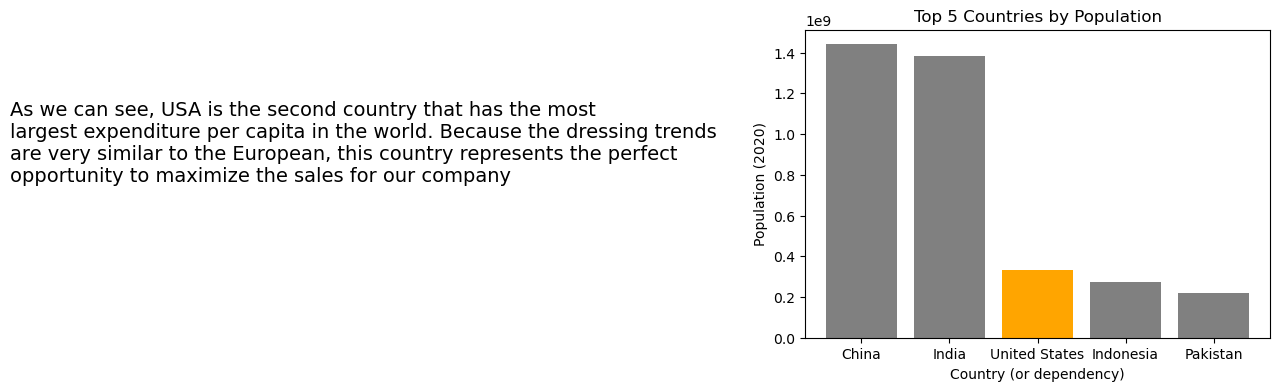

In [54]:

#creating a bar chart the biggest spending countries per person
hhe_sorted = hhe.sort_values(by='HouseholdExpenditurePerCapita', ascending=False)
hhe_top5 = hhe_sorted.head(5)

colors = ['grey', 'orange', 'grey', 'grey', 'grey']

plt.figure(figsize=(6, 4))
plt.bar(hhe_top5['Country'], hhe_top5['HouseholdExpenditurePerCapita'], color = colors)
plt.xlabel('Country')
plt.ylabel('HouseholdExpenditurePerCapita')
plt.title('Top 5 Countries by Value')
plt.text(1, 0.5, """As we can see, USA is the second country that has the most 
largest expenditure per capita in the world. Because the dressing trends 
are very similar to the European, this country represents the perfect 
opportunity to maximize the sales for our company""",fontsize=14, transform=plt.gcf().transFigure)



#Creating a bar chart for the top 5 biggest countries 
population_sorted = population.sort_values(by= 'Population (2020)', ascending = False)
population_top5 = population_sorted.head(5)

colors = ['grey', 'grey', 'orange', 'grey', 'grey']

plt.figure(figsize=(6, 4))
plt.bar(population_top5['Country (or dependency)'], population_top5['Population (2020)'], color = colors)
plt.xlabel('Country (or dependency)')
plt.ylabel('Population (2020)')
plt.title('Top 5 Countries by Population')

plt.text(-1.2, 0.5, """As we can see, USA is the second country that has the most 
largest expenditure per capita in the world. Because the dressing trends 
are very similar to the European, this country represents the perfect 
opportunity to maximize the sales for our company""",fontsize=14, transform=plt.gcf().transFigure)


plt.show()









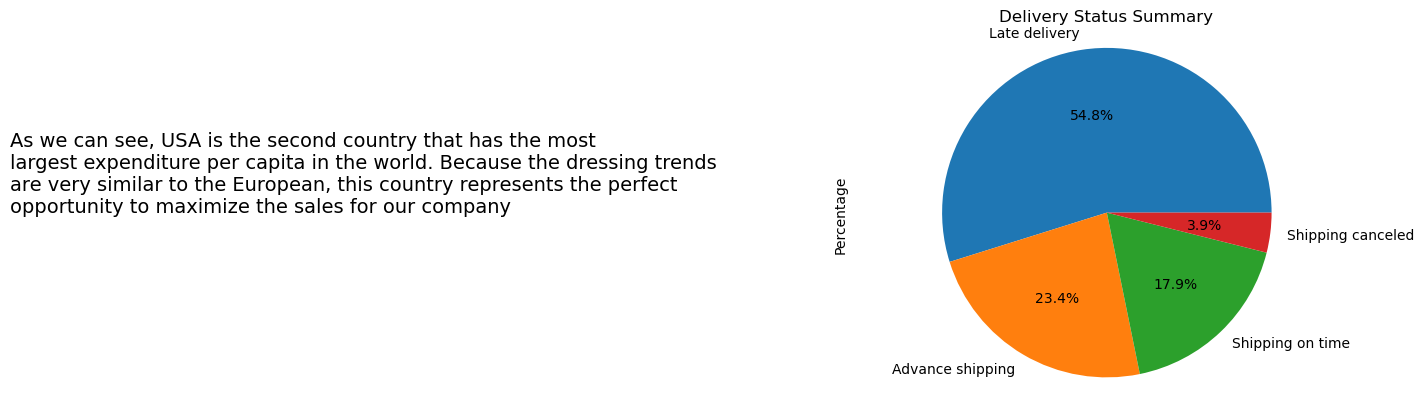

In [123]:

def summarize_delivery_status(df):
    suppliers = df['Delivery Status'].value_counts()
    suppliers_percents = suppliers / suppliers.sum() * 100
    summary_suppliers = pd.concat([suppliers, suppliers_percents], axis=1, keys=['Count', 'Percentage'])
    return summary


delivery_status = chart.loc[(chart['Department Name'] == 'Apparel') & \
                            (chart['Category Name'].isin(["Women's Clothing",
                                                          "Men's Clothing",
                                                          "Children's Clothing"]))]

summary = summarize_delivery_status(delivery_status)
summary['Percentage'].plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Delivery Status Summary')
plt.text(-1.2, 0.5, """As we can see, USA is the second country that has the most 
largest expenditure per capita in the world. Because the dressing trends 
are very similar to the European, this country represents the perfect 
opportunity to maximize the sales for our company""",fontsize=14, transform=plt.gcf().transFigure)
plt.show()



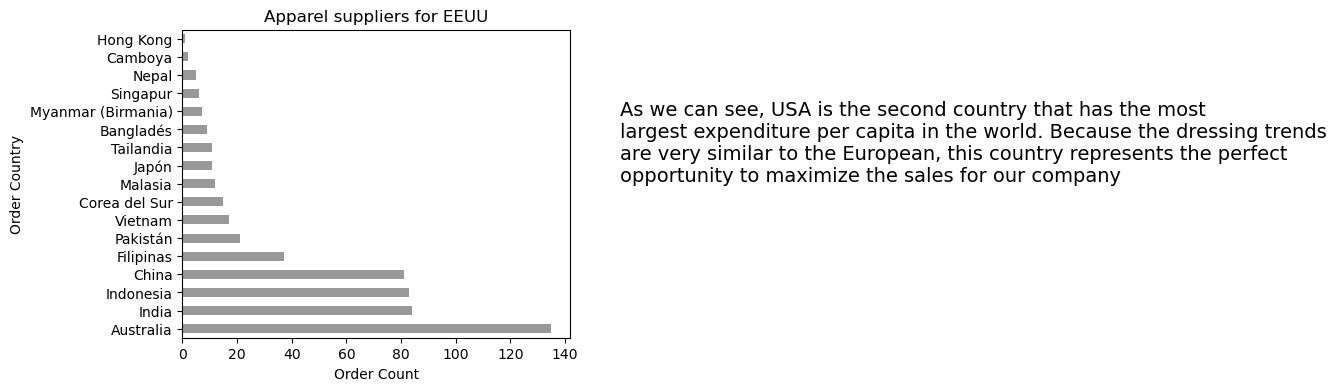

In [119]:
def summarize_order_country(df, department_name, customer_country, category_names):
    delivery_status = df.loc[(df['Department Name'] == department_name) & \
                             (df['Customer Country'] == customer_country) & \
                             (df['Category Name'].isin(category_names))]
    order_country_counts = delivery_status['Order Country'].value_counts()
    order_country_percents = order_country_counts / order_country_counts.sum() * 100
    summary1 = pd.concat([order_country_counts, order_country_percents], axis=1, keys=['Count', 'Percentage'])
    return summary1.head(20)

department_name = 'Apparel'
customer_country = 'EE. UU.'
category_names = ["Women's Clothing", "Men's Clothing"]

summary1 = summarize_order_country(delivery_status, department_name, customer_country, category_names)
txt = "\n As we can see, USA is the second country that has the most largest expenditure per capita in the world the dressing trends are very similar to the European, this country represents the perfect opportunity to maximize the sales for our company."

fig, ax = plt.subplots(figsize=(5, 4))
summary1.plot.barh(y='Count', color='gray', alpha=0.8, legend=False, ax=ax)
ax.set_title('Apparel suppliers for EEUU')
ax.set_xlabel('Order Count')
ax.set_ylabel('Order Country')

txt = """As we can see, USA is the second country that has the most 
largest expenditure per capita in the world. Because the dressing trends 
are very similar to the European, this country represents the perfect 
opportunity to maximize the sales for our company"""

plt.text(1, 0.5, txt, fontsize=14, transform=plt.gcf().transFigure)

plt.show()



In [124]:
def summarize_delivery_status(df):
    summary = pd.pivot_table(df, index=["Shipping Mode", "Delivery Status"], values=["Sales"], aggfunc=np.sum)
    summary['Percentage'] = summary.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    return summary


delivery_status = chart.loc[(chart['Department Name'] == 'Apparel') & \
                            (chart['Category Name'].isin(["Women's Clothing",
                                                          "Men's Clothing",
                                                          "Children's Clothing"]))]
delivery_status_pivot = summarize_delivery_status(delivery_status)
print(delivery_status_pivot)

                                         Sales  Percentage
Shipping Mode  Delivery Status                            
First Class    Late delivery      51646.501279   94.508596
               Shipping canceled   3000.910065    5.491404
Same Day       Late delivery       8725.830230   41.951650
               Shipping canceled   1778.390045    8.550063
               Shipping on time   10295.510253   49.498287
Second Class   Late delivery      70165.261685   76.525743
               Shipping canceled   4357.600097    4.752617
               Shipping on time   17165.580413   18.721640
Standard Class Advance shipping   98111.952327   39.270947
               Late delivery      96765.202297   38.731888
               Shipping canceled   7785.180175    3.116148
               Shipping on time   47171.091123   18.881017


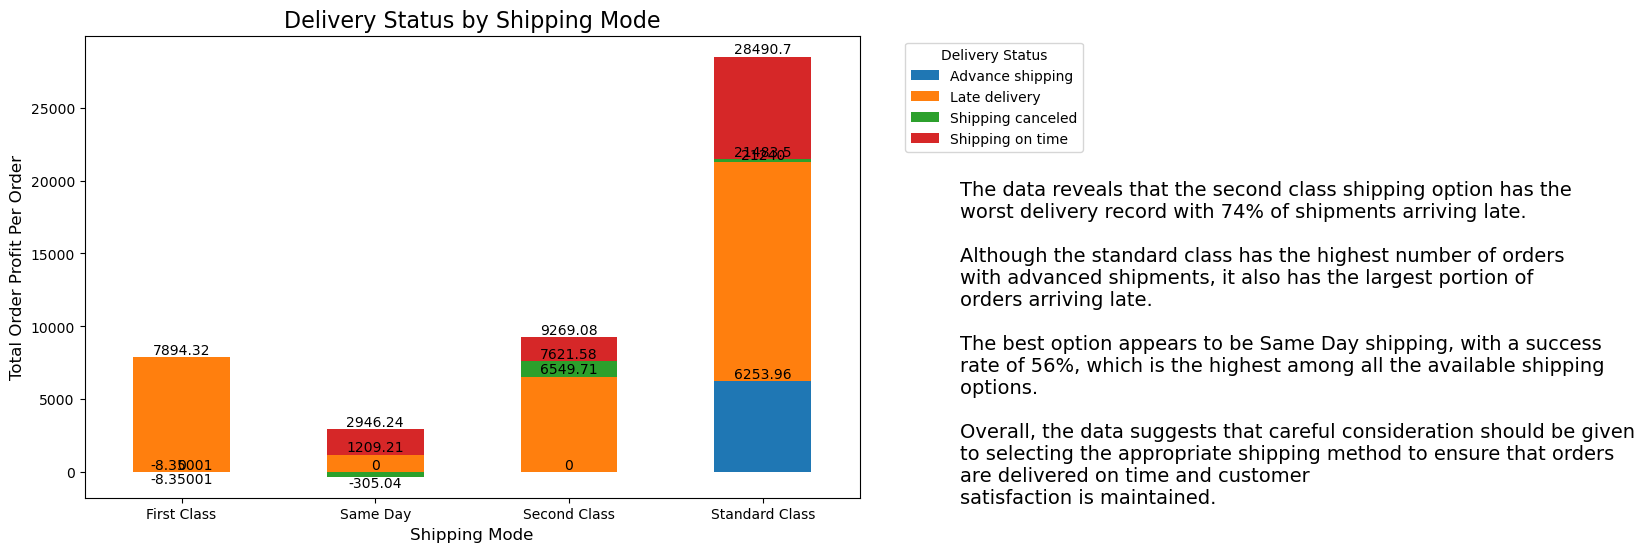

In [165]:
def summarize_delivery_status(df):
    shipping_mode = 'Shipping Mode'
    delivery_status = 'Delivery Status'
    
    summary = pd.pivot_table(df, 
                             values='Order Profit Per Order', 
                             index=[shipping_mode], 
                             columns=[delivery_status],
                             aggfunc='sum', 
                             fill_value=0)
    
    summary[delivery_status + ' %'] = summary.sum(axis=1) / summary.sum().sum() * 100
    return summary

pivot = delivery_status.pivot_table(index='Shipping Mode', columns='Delivery Status', values='Order Profit Per Order', aggfunc='sum')

# Create stacked bar plot
ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set plot properties

plt.title('Delivery Status by Shipping Mode', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Total Order Profit Per Order', fontsize=12)
plt.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')

txt = """
The data reveals that the second class shipping option has the
worst delivery record with 74% of shipments arriving late. 

Although the standard class has the highest number of orders 
with advanced shipments, it also has the largest portion of 
orders arriving late. 

The best option appears to be Same Day shipping, with a success
rate of 56%, which is the highest among all the available shipping
options. 

Overall, the data suggests that careful consideration should be given
to selecting the appropriate shipping method to ensure that orders
are delivered on time and customer 
satisfaction is maintained."""

plt.text(1, 0.1, txt, fontsize=14, transform=plt.gcf().transFigure)

plt.show()


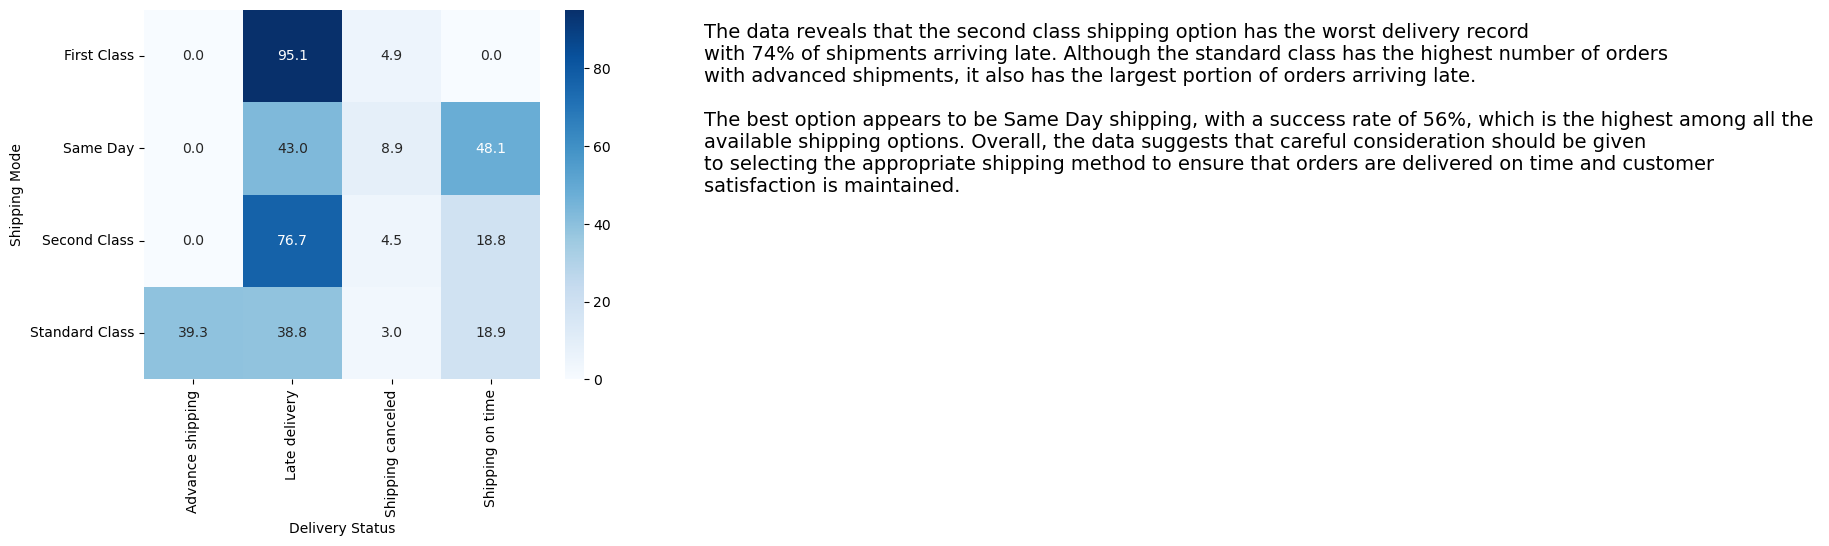

In [152]:

# create the pivot table with Shipping Mode as rows and Delivery Status as columns
pivot_table = pd.pivot_table(delivery_status, index='Shipping Mode', columns='Delivery Status', 
                             aggfunc='size', fill_value=0)

# calculate the subtotals for each row
row_totals = pivot_table.sum(axis=1)

# calculate the percentages of the sub-total for each cell
percentages = pivot_table.div(row_totals, axis=0) * 100

# create the heatmap with seaborn
sns.heatmap(percentages, annot=True, fmt=".1f", cmap='Blues')

# add labels to the x and y axes
plt.xlabel("Delivery Status")
plt.ylabel("Shipping Mode")
txt = """The data reveals that the second class shipping option has the worst delivery record
with 74% of shipments arriving late. Although the standard class has the highest number of orders 
with advanced shipments, it also has the largest portion of orders arriving late. 

The best option appears to be Same Day shipping, with a success rate of 56%, which is the highest among all the 
available shipping options. Overall, the data suggests that careful consideration should be given
to selecting the appropriate shipping method to ensure that orders are delivered on time and customer 
satisfaction is maintained."""

plt.text(1, 0.5, txt, fontsize=14, transform=plt.gcf().transFigure)

# display the plot
plt.show()

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

chart['Order ID'] = range(1, len(chart)+1)

# Pivot the data to show the count of Delivery Status for each Shipping Mode
shipping_status_pivot = pd.pivot_table(delivery_status, index='Shipping Mode', columns='Delivery Status', values='Order ID', aggfunc='count', fill_value=0)

# Calculate the percentage of each delivery status for each shipping mode
total = shipping_status_pivot.sum(axis=1)
shipping_status_pivot_percent = shipping_status_pivot.divide(total, axis=0).mul(100)

# Create a heatmap of the percentage of Delivery Status for each Shipping Mode
plt.figure(figsize=(8, 6))
sns.heatmap(shipping_status_pivot_percent, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': 'Percentage of Delivery Status'})
plt.title('Percentage of Delivery Status by Shipping Mode')
plt.xlabel('Delivery Status')
plt.ylabel('Shipping Mode')
plt.show()

KeyError: 'Order ID'

<AxesSubplot:xlabel='Delivery Status', ylabel='Shipping Mode'>

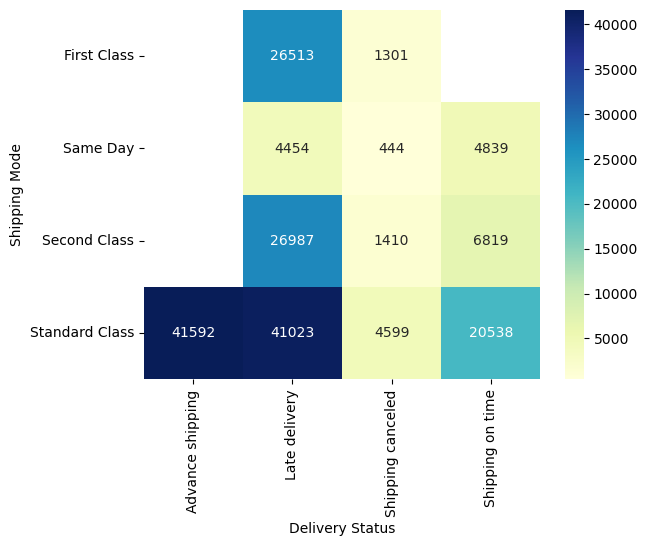

In [144]:
chart['Order ID'] = range(1, len(chart)+1)

import seaborn as sns

# Pivot table to summarize distribution of Shipping Mode and Delivery Status
pivot = pd.pivot_table(chart, values='Order ID', index=['Shipping Mode'], columns=['Delivery Status'], aggfunc='count')

# Heatmap to visualize the pivot table
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")

In [147]:
pivot = chart.pivot_table(index='Shipping Mode', columns='Delivery Status', values='Order ID', aggfunc='count', fill_value=0, normalize='index')

TypeError: pivot_table() got an unexpected keyword argument 'normalize'

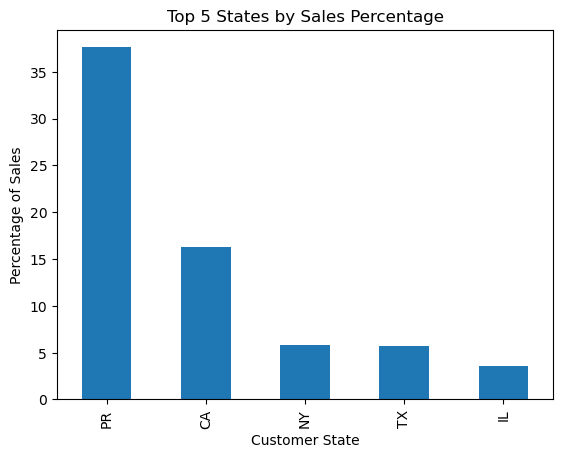

In [169]:
pivot_table = pd.pivot_table(chart_filtered,
                             index='Customer State',
                             values='Sales',
                             aggfunc='sum')

# add percentage column
pivot_table['Percentage'] = pivot_table['Sales'] / pivot_table['Sales'].sum() * 100

# sort by sales in descending order
pivot_table = pivot_table.sort_values('Sales', ascending=False)

top_states = pivot_table.sort_values(by='Percentage', ascending=False).head(5)
plt.barh(top_states.index, top_states['Percentage'])
plt.title('Top 5 States by Sales Percentage')
plt.xlabel('Percentage')
plt.ylabel('Customer State')
plt.show()


print(pivot_table)